In [1]:
# to keep tap on each cell processing time
!pip install ipython-autotime 
%load_ext autotime

time: 436 µs (started: 2025-08-18 12:03:55 +00:00)


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/high-quality-invoice-images-for-ocr/batch_1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_3.csv
/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_2/batch1-0664.jpg
/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_3/batch1-1110.jpg
/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_1/batch1-0208.jpg
time: 3.73 s (started: 2025-08-18 12:03:55 +00:00)


In [3]:
!pip install -q torch accelerate datasets peft bitsandbytes tensorboard 'transformers>=4.49.0'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not c

In [4]:
csv_file = "/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_1.csv"
df = pd.read_csv(csv_file)
df.head()

,File Name,Json Data,OCRed Text
0,batch1-0494.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Clark...",Invoice no: 84652373 Date of issue: 02/23/2021...
1,batch1-0489.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Willi...",Invoice no: 37451664 Date of issue: 06/11/2020...
2,batch1-0499.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Heste...",Invoice no: 40108666 Date of issue: 02/07/2020...
3,batch1-0497.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Olson...",Invoice no: 73285932 Date of issue: 07/25/2017...
4,batch1-0081.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Wilso...",Invoice no: 15288019 Date of issue: 09/07/2014...


time: 77.4 ms (started: 2025-08-18 12:05:17 +00:00)


In [5]:
# convert string into json
df["Json Data"] = df.apply(lambda x: json.loads(x["Json Data"]), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   File Name   499 non-null    object
 1   Json Data   499 non-null    object
 2   OCRed Text  499 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB
time: 94.9 ms (started: 2025-08-18 12:05:18 +00:00)


In [6]:
df[df["File Name"]=="batch1-0104.jpg"]["Json Data"].values[0]

{'invoice': {'client_name': 'Lozano-Lindsey',
  'client_address': '47773 Miller Court\nHarrisonmouth, ME 64015',
  'seller_name': 'Baker-Smith',
  'seller_address': 'PSC 8796, Box 5451\nAPO AA 79359',
  'invoice_number': '90188228',
  'invoice_date': '03/28/2016',
  'due_date': ''},
 'items': [{'description': "Women's black cocktail dress, size 4",
   'quantity': '5.00',
   'total_price': '109.94'},
  {'description': 'Coolibar Sun Protection Tunic Dress Cover Up Size Small S\nPink Pattern UPF 50',
   'quantity': '4.00',
   'total_price': '118.76'},
  {'description': 'NWT DRA M White Embroidered Nathalie Bohemian Mini Dress',
   'quantity': '4.00',
   'total_price': '91.96'},
  {'description': 'Vintage 80s All That Jazz Blue Velvet Dress Small/Medium',
   'quantity': '3.00',
   'total_price': '33.00'}],
 'subtotal': {'tax': '32.15', 'discount': '', 'total': '353.66'},
 'payment_instructions': {'due_date': '',
  'bank_name': '',
  'account_number': '',
  'payment_method': ''}}

time: 4.89 ms (started: 2025-08-18 12:05:18 +00:00)


# Visualise a few invoice

In [7]:
#helper function to visualise invoices
import os
import math
import random
import matplotlib.pyplot as plt
from PIL import Image



def show_random_invoice_images(img_dir, num_images=6, num_cols=3):
    """
    Display a grid of random invoice images from a specified directory.

    Args:
        img_dir (str): Path to the directory containing invoice images.
        num_images (int): Number of random images to display.
        num_cols (int): Number of columns in the display grid.

    Returns:
        None
    """
    # List all image files in the directory
    image_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Limit number of images if fewer are available
    num_images = min(num_images, len(image_files))

    # Randomly sample images
    sampled_images = random.sample(image_files, num_images)

    # Calculate rows based on columns
    num_rows = math.ceil(num_images / num_cols)

    # Set plot size
    plt.figure(figsize=(4 * num_cols*2, 4 * num_rows*2))

    for i, img_name in enumerate(sampled_images):
        img_path = os.path.join(img_dir, img_name)
        img = Image.open(img_path)

        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        plt.title(img_name, fontsize=20)
        plt.axis('off')

    plt.tight_layout()
    plt.show()



time: 1.2 ms (started: 2025-08-18 12:05:18 +00:00)


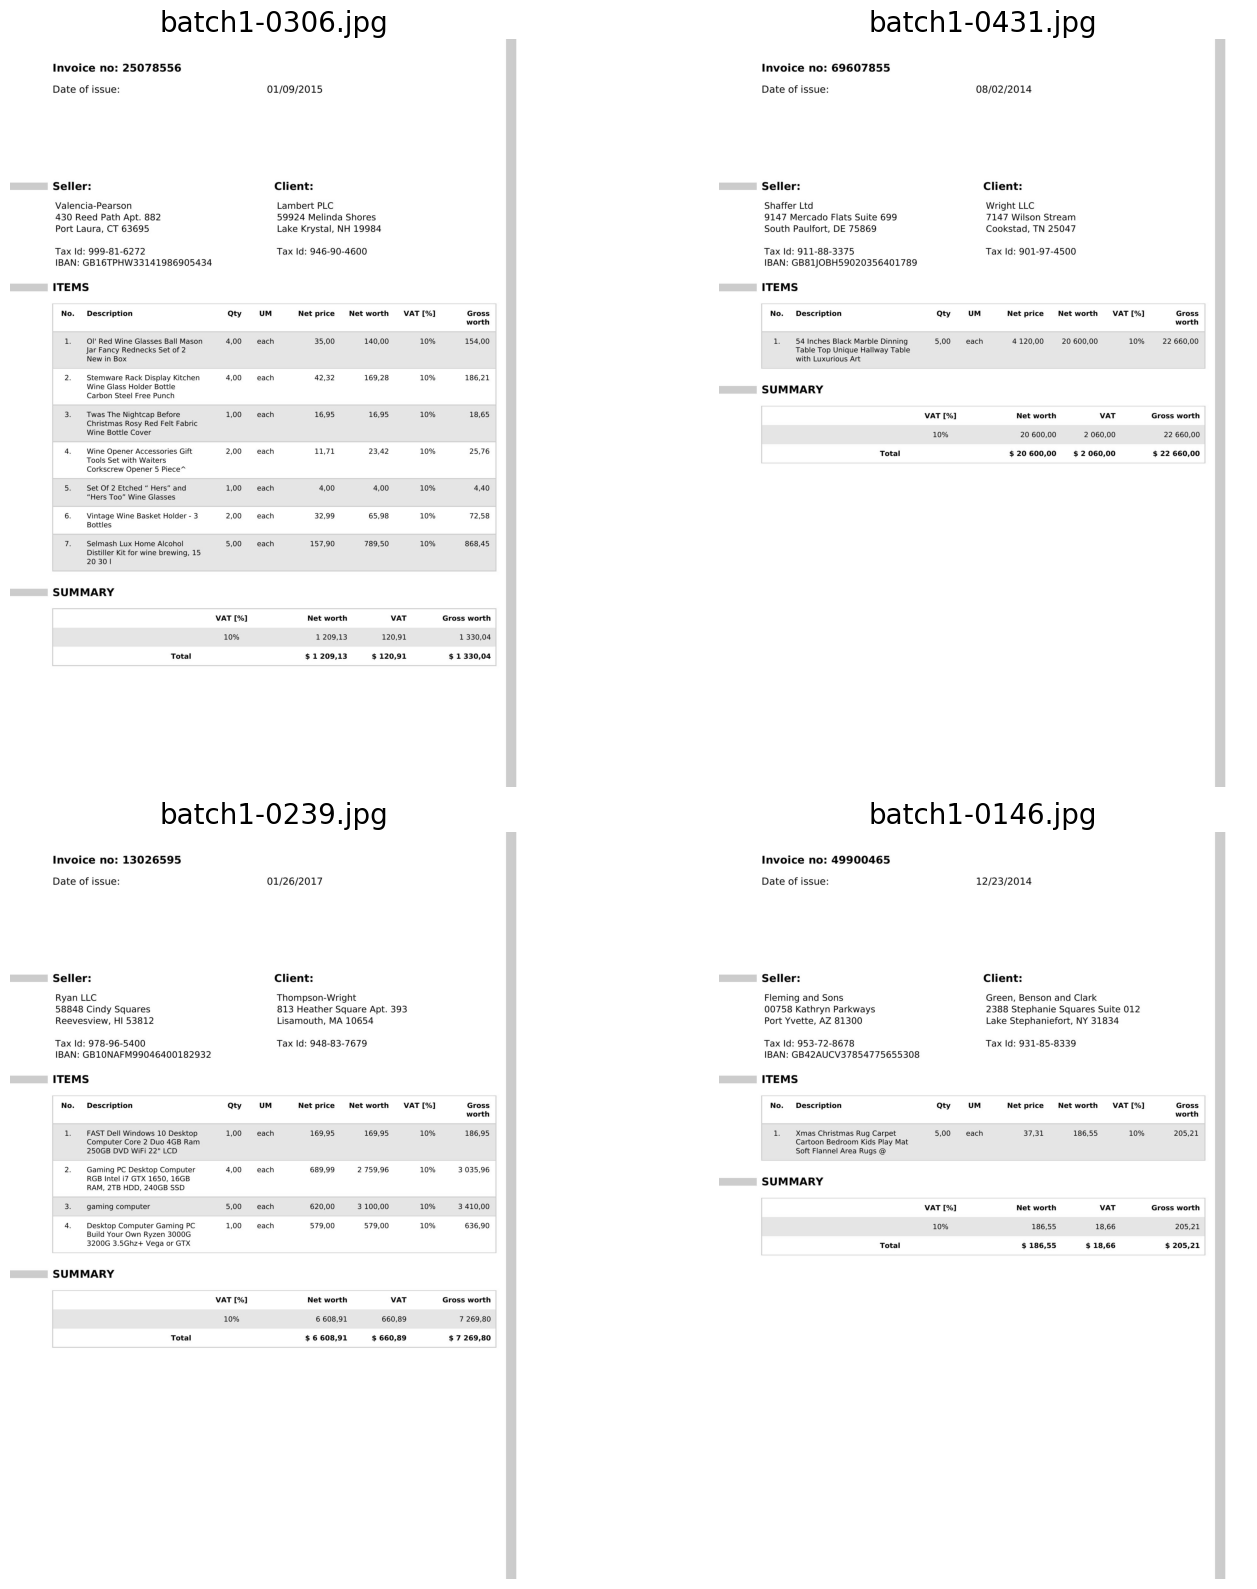

time: 2.32 s (started: 2025-08-18 12:05:18 +00:00)


In [8]:
# Set the path to your invoice images
img_dir = '/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_1'
show_random_invoice_images(img_dir, 4, 2)

In [9]:
# base prompt
prompt_a = """
You are an intelligent invoice parser. From the provided invoice imag, extract the following structured information and return it in valid JSON format. 
Follow the descriptions and formatting guidelines for each field exactly. 

Field Descriptions and Format Requirements:

client_name: The full name of the client (person or company) to whom the invoice is issued. Must be a single string without extra labels like "Bill To" or "Client:".
client_address: The complete mailing address of the client. It may span multiple lines. Include line breaks as \n. Remove any label like "Address:" or "Client Address:".
seller_name: The full name of the seller or vendor (person or company) issuing the invoice. A single string only.
seller_address: The full address of the seller. It may span multiple lines. Include line breaks as \n.
invoice_number: A unique identifier for the invoice. Often labeled as "Invoice No.", "Invoice #", or simply "No.". Extract the alphanumeric value exactly.
invoice_date: The date the invoice was issued. Must be in MM/DD/YYYY format. If the original format differs (e.g., DD-MM-YYYY or YYYY/MM/DD), convert it to MM/DD/YYYY.
tax: The tax amount applied on the invoice. Extract only the numeric part (e.g., 809.62) and preserve the original formatting for decimals and thousand separators if present (e.g., 1,234.56 or 809,62).
discount: Any discount applied. Use the same formatting as for tax. If not present, use "".
total: The gross total amount after applying tax and discount. This should reflect the final amount the client has to pay. Maintain the original number formatting (e.g., 8 905,77 or 8,905.77).


Expected JSON Output Format:

{
  "client_name": "",
  "client_address": "",
  "seller_name": "",
  "seller_address": "",
  "invoice_number": "",
  "invoice_date": "",
  "tax": "",
  "discount": "",
  "total": ""
}

Guidelines:
- If any field is missing or not explicitly mentioned in the text, use an empty string ("") as its value.
- Do not halluciante
"""

time: 755 µs (started: 2025-08-18 12:05:20 +00:00)


In [10]:
print(prompt_a)


You are an intelligent invoice parser. From the provided invoice imag, extract the following structured information and return it in valid JSON format. 
Follow the descriptions and formatting guidelines for each field exactly. 

Field Descriptions and Format Requirements:

client_name: The full name of the client (person or company) to whom the invoice is issued. Must be a single string without extra labels like "Bill To" or "Client:".
client_address: The complete mailing address of the client. It may span multiple lines. Include line breaks as 
. Remove any label like "Address:" or "Client Address:".
seller_name: The full name of the seller or vendor (person or company) issuing the invoice. A single string only.
seller_address: The full address of the seller. It may span multiple lines. Include line breaks as 
.
invoice_number: A unique identifier for the invoice. Often labeled as "Invoice No.", "Invoice #", or simply "No.". Extract the alphanumeric value exactly.
invoice_date: The d

## Load model using Huggingface

In [11]:
from transformers import AutoProcessor, AutoModelForVision2Seq
import torch
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(F"Device: {DEVICE}")
processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-Instruct")
model = AutoModelForVision2Seq.from_pretrained("HuggingFaceTB/SmolVLM-Instruct",
                                                torch_dtype=torch.bfloat16,
                                               _attn_implementation= "sdpa").to(DEVICE)
                                                # _attn_implementation="flash_attention_2" if DEVICE == "cuda" else "eager").to(DEVICE)
model

2025-08-18 12:05:33.972379: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755518734.157272      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755518734.210247      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Device: cuda


processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/429 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/486 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

Idefics3ForConditionalGeneration(
  (model): Idefics3Model(
    (vision_model): Idefics3VisionTransformer(
      (embeddings): Idefics3VisionEmbeddings(
        (patch_embedding): Conv2d(3, 1152, kernel_size=(14, 14), stride=(14, 14), padding=valid)
        (position_embedding): Embedding(729, 1152)
      )
      (encoder): Idefics3Encoder(
        (layers): ModuleList(
          (0-26): 27 x Idefics3EncoderLayer(
            (self_attn): Idefics3VisionAttention(
              (k_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (v_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (q_proj): Linear(in_features=1152, out_features=1152, bias=True)
              (out_proj): Linear(in_features=1152, out_features=1152, bias=True)
            )
            (layer_norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=True)
            (mlp): Idefics3VisionMLP(
              (activation_fn): PytorchGELUTanh()
              (fc1): Linear(in_

time: 1min 7s (started: 2025-08-18 12:05:21 +00:00)


In [12]:
# from PIL import Image
# from transformers.image_utils import load_image

# # Load images
# image1 = load_image("/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_1/batch1-0002.jpg")
# image2 = load_image("/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_1/batch1-0009.jpg")

# # Create input messages
# messages = [
#     {
#         "role": "user",
#         "content": [
#             {"type": "image"},
#             {"type": "text", "text": f"{prompt_a}"}
#         ]
#     },
# ]

# # Prepare inputs
# prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
# inputs = processor(text=prompt, images=[image1], return_tensors="pt")
# inputs = inputs.to(DEVICE)
# input_ids_len = inputs["input_ids"].shape[1]
# input_ids_len

time: 972 µs (started: 2025-08-18 12:06:28 +00:00)


In [13]:
#final version of prompt compatible for specific model
# prompt

time: 287 µs (started: 2025-08-18 12:06:29 +00:00)


In [14]:
# Generate outputs
# generated_ids = model.generate(**inputs, max_new_tokens=500)

# #  Slice off the input tokens
# new_tokens = generated_ids[0][input_ids_len:]

# # Decode only the new/generated tokens
# generated_text = processor.tokenizer.decode(new_tokens, skip_special_tokens=True)

# print(generated_text.strip())

time: 440 µs (started: 2025-08-18 12:06:29 +00:00)


Approx 6BG GPU RAM and 7 to 11 sec response time for above generation.

In [15]:
# image1

time: 268 µs (started: 2025-08-18 12:06:29 +00:00)


## Prepare Updated prompt

# Let do Batch Inference for getting baseline model number

In [16]:
#load the images
import os
from transformers.image_utils import load_image

img_folder_path = "/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_1"
images_path = []
invoice_no_lst = []
for file in os.listdir(img_folder_path):
    if file.endswith(".jpg"):
        images_path.append(os.path.join(img_folder_path, file))
        invoice_no_lst.append(file)
    else:
        print(f"Differen then .jpg file here: {file}")

time: 7.07 ms (started: 2025-08-18 12:06:29 +00:00)


In [17]:
# images = [load_image(path) for path in images_path]
# print(len(images_path), len(invoice_no_lst))

# # for initial testing of the limit of batch size for given gpu
# first_x = 5
# images_selected = images[:first_x]
# images_path_selected = images_path[:first_x]
# invoice_no_lst = invoice_no_lst[:first_x]

# max_new_tokens = 300
# messages = [
#         {
#             "role": "user",
#             "content": [
#                 {"type": "image"},
#                 {"type": "text", "text": prompt_a}
#             ]
#         }
#     ]

# # Prepare batch inputs
# prompts = []
# input_ids_lens = []


# #create prompt as per model's chat template and append in list
# for img in invoice_no_lst:
#     prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
#     prompts.append(prompt)

# # Process the batch
# inputs = processor(text=prompts, images=images_selected, return_tensors="pt", padding=True)
# input_ids_lens = [len(input_id) for input_id in inputs["input_ids"]]
# inputs = inputs.to(DEVICE)

# # Generate batch outputs
# # Run inference
# with torch.no_grad():
#     generated_ids = model.generate(**inputs, max_new_tokens=max_new_tokens)
    
# # Decode each output by slicing off input tokens
# extracted_data = []
# for i, (gen, img_path) in enumerate(zip(generated_ids, images_path_selected)):
#     new_tokens = gen[input_ids_lens[i]:]
#     print(f"New token Length: {len(new_tokens)}")
#     generated_text = processor.tokenizer.decode(new_tokens, skip_special_tokens=True)
#     extracted_data.append(json.dumps(generated_text.strip()))
#     # print(f"Output for image {i+1} {img_path.split('/')[-1]}:\n{generated_text.strip()}\n")
# len(extracted_data)


# # save output

# df = pd.DataFrame({"invoice_no":invoice_no_lst,
#               "vlm_response": extracted_data})
# df.to_csv("extracted_data.csv", index=False)
# df.head()

time: 615 µs (started: 2025-08-18 12:06:29 +00:00)


In [18]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from transformers.image_utils import load_image
import torch
import pandas as pd

messages = [
        {
            "role": "user",
            "content": [
                {"type": "image"},
                {"type": "text", "text": prompt_a}
            ]
        }
    ]

class InvoiceDataset(Dataset):
    def __init__(self, image_paths, invoice_numbers, messages, processor):
        self.image_paths = image_paths
        self.invoice_numbers = invoice_numbers
        self.messages = messages
        self.processor = processor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = load_image(self.image_paths[idx])
        invoice_number = self.invoice_numbers[idx]
        return {"image": image, "prompt": self.messages, "invoice_number": invoice_number}

def custom_collate_fn(batch):
    images = [item["image"] for item in batch]
    prompts = [processor.apply_chat_template(item["prompt"], add_generation_prompt=True) for item in batch]
    invoice_numbers = [item["invoice_number"] for item in batch]
    processor_outputs = processor(text=prompts, images=images, return_tensors="pt", padding=True)
    processor_outputs["invoice_numbers"] = invoice_numbers
    return processor_outputs


# Initialize dataset and dataloader
dataset = InvoiceDataset(images_path, invoice_no_lst, messages, processor)
dataloader = DataLoader(dataset, batch_size=5, num_workers=0, pin_memory=True, collate_fn=custom_collate_fn)


time: 2.42 ms (started: 2025-08-18 12:06:29 +00:00)


In [19]:
#inspecting batch
batch = next(iter(dataloader))
print(batch.keys())  # Displays the keys in the batch dictionary
for key, value in batch.items():
    if key == 'invoice_numbers':
        print(f"{key}: shape = {len(value)}, dtype = {type(value)}, values: {value}")
    else:
        print(f"{key}: shape = {value.shape}, dtype = {value.dtype}")

dict_keys(['pixel_values', 'pixel_attention_mask', 'input_ids', 'attention_mask', 'invoice_numbers'])
pixel_values: shape = torch.Size([5, 13, 3, 384, 384]), dtype = torch.float32
pixel_attention_mask: shape = torch.Size([5, 13, 384, 384]), dtype = torch.int64
input_ids: shape = torch.Size([5, 1725]), dtype = torch.int64
attention_mask: shape = torch.Size([5, 1725]), dtype = torch.int64
invoice_numbers: shape = 5, dtype = <class 'list'>, values: ['batch1-0208.jpg', 'batch1-0021.jpg', 'batch1-0074.jpg', 'batch1-0085.jpg', 'batch1-0285.jpg']
time: 1.95 s (started: 2025-08-18 12:06:29 +00:00)


In [20]:
dataloader

time: 1.76 ms (started: 2025-08-18 12:06:31 +00:00)


In [21]:
from torch.amp import autocast
from itertools import islice

model.eval()
extracted_data = []
invoice_number_list = [] 
counter = 0

for batch in dataloader: #islice(dataloader, 5):
    counter += 1
    invoice_numbers = batch.pop("invoice_numbers")
    batch = {k: v.to(DEVICE, non_blocking=True) for k, v in batch.items()}
    input_ids_lens = [len(input_id) for input_id in batch["input_ids"]]

    with torch.no_grad():
        with autocast(device_type='cuda'):
            generated_ids = model.generate(**batch, max_new_tokens=300)

    for i, gen in enumerate(generated_ids):
        new_tokens = gen[input_ids_lens[i]:]
        generated_text = processor.tokenizer.decode(new_tokens, skip_special_tokens=True)
        extracted_data.append(generated_text.strip())
    invoice_number_list.extend(invoice_numbers)

    if counter%10==0:
        # save result after each batch run
        df = pd.DataFrame({"invoice_no":invoice_number_list,
                      "vlm_response": extracted_data})
        df.to_csv("extracted_data.csv", index=False)
        print(f"length of extracted_data {len(extracted_data)} & {len(invoice_number_list)}")

# save result after whole loop
df = pd.DataFrame({"invoice_no":invoice_number_list,
              "vlm_response": extracted_data})
df.to_csv("extracted_data.csv", index=False)
print(f"length of extracted_data {len(extracted_data)} & {len(invoice_number_list)}")

length of extracted_data 50 & 50
length of extracted_data 100 & 100
length of extracted_data 150 & 150
length of extracted_data 200 & 200
length of extracted_data 250 & 250
length of extracted_data 300 & 300
length of extracted_data 350 & 350
length of extracted_data 400 & 400
length of extracted_data 450 & 450
length of extracted_data 499 & 499
length of extracted_data 499 & 499
time: 1h 1min 46s (started: 2025-08-18 12:06:32 +00:00)


It took around 1 hr to infer on 499 data points on P100

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   invoice_no    499 non-null    object
 1   vlm_response  499 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB
time: 6 ms (started: 2025-08-18 13:08:18 +00:00)


In [23]:
df.head()

,invoice_no,vlm_response
0,batch1-0208.jpg,"{\n ""client_name"": ""Jordan LLC"",\n ""clie..."
1,batch1-0021.jpg,"{\n ""client_name"": ""Alexander-Petersen"",\n ..."
2,batch1-0074.jpg,"{\n ""client_name"": ""Patterson, Pierce and F..."
3,batch1-0085.jpg,"{\n ""client_name"": ""Myers Inc"",\n ""clien..."
4,batch1-0285.jpg,"{\n ""client_name"": ""Wilson-Martinez"",\n ..."


time: 4.1 ms (started: 2025-08-18 13:08:18 +00:00)


# Ground truth

In [24]:
import pandas as pd
csv_file = "/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_1.csv"
df = pd.read_csv(csv_file)
# df = df.rename(columns={'File Name': 'file_name'})
df.head()

,File Name,Json Data,OCRed Text
0,batch1-0494.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Clark...",Invoice no: 84652373 Date of issue: 02/23/2021...
1,batch1-0489.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Willi...",Invoice no: 37451664 Date of issue: 06/11/2020...
2,batch1-0499.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Heste...",Invoice no: 40108666 Date of issue: 02/07/2020...
3,batch1-0497.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Olson...",Invoice no: 73285932 Date of issue: 07/25/2017...
4,batch1-0081.jpg,"\n{\n ""invoice"": {\n ""client_name"": ""Wilso...",Invoice no: 15288019 Date of issue: 09/07/2014...


time: 24.7 ms (started: 2025-08-18 13:08:18 +00:00)


In [25]:
all_fields = [
  "client_name",
  "client_address",
  "seller_name",
  "seller_address",
  "invoice_number",
  "invoice_date",
  "tax",
  "discount",
  "total"]

time: 317 µs (started: 2025-08-18 13:08:18 +00:00)


In [26]:
df[df['File Name']=='batch1-0081.jpg']['Json Data'].values[0]

'\n{\n  "invoice": {\n    "client_name": "Wilson-Wilson",\n    "client_address": "85455 Carter Estate\\nMooremouth, CT 29699",\n    "seller_name": "Fernandez Ltd",\n    "seller_address": "06398 Jensen Loaf\\nAndrewton, AR 65741",\n    "invoice_number": "15288019",\n    "invoice_date": "09/07/2014",\n    "due_date": ""\n  },\n  "items": [\n    {\n      "description": "Easy No Tie Rubber Shoe Laces\\nColored Trainers Snickers Kids\\n+ Adults Shoelaces",\n      "quantity": "1.00",\n      "total_price": "1.71"\n    }\n  ],\n  "subtotal": {\n    "tax": "0.16",\n    "discount": "",\n    "total": "1.71"\n  },\n  "payment_instructions": {\n    "due_date": "",\n    "bank_name": "",\n    "account_number": "",\n    "payment_method": ""\n  }\n}\n'

time: 3.12 ms (started: 2025-08-18 13:08:18 +00:00)


In [27]:
#flat the json from gt data and extract only selected fields as requested_data
rows = []
for idx, row in df.iterrows():
    json_data = row['Json Data']
    try:
        data = json.loads(json_data)
    except Exception:
        data = eval(json_data)
    invoice = data.get("invoice", {})
    subtotal = data.get("subtotal", {})
    items = data.get("items", [])
    # Build flat dict only for fields present in config
    flat = {}
    for field in all_fields:
        if field.startswith("item_"):
            # Parse item fields like item_1_description, item_2_quantity, etc.
            parts = field.split("_")
            if len(parts) == 3 and parts[0] == "item":
                idx = int(parts[1]) - 1
                key = parts[2]
                if idx < len(items):
                    flat[field] = items[idx].get(key if key != "total_price" else "total_price", "")
                else:
                    flat[field] = ""
            else:
                flat[field] = ""
        else:
            # Header fields
            if field in invoice:
                flat[field] = invoice.get(field, "")
            elif field in subtotal:
                flat[field] = subtotal.get(field, "")
            else:
                flat[field] = ""

    requested_data = {k: flat[k] for k in all_fields}
    rows.append({
        "file_name": row["File Name"],
        "invoice_no": flat.get("invoice_number", ""),
        "requested_parameters": json.dumps(all_fields),
        "requested_data": json.dumps(requested_data)
    })

out_df = pd.DataFrame(rows)
out_df.head()

,file_name,invoice_no,requested_parameters,requested_data
0,batch1-0494.jpg,84652373,"[""client_name"", ""client_address"", ""seller_name...","{""client_name"": ""Clark-Foster"", ""client_addres..."
1,batch1-0489.jpg,37451664,"[""client_name"", ""client_address"", ""seller_name...","{""client_name"": ""Williams, Schneider and Gomez..."
2,batch1-0499.jpg,40108666,"[""client_name"", ""client_address"", ""seller_name...","{""client_name"": ""Hester Inc"", ""client_address""..."
3,batch1-0497.jpg,73285932,"[""client_name"", ""client_address"", ""seller_name...","{""client_name"": ""Olson, Cisneros and Moore"", ""..."
4,batch1-0081.jpg,15288019,"[""client_name"", ""client_address"", ""seller_name...","{""client_name"": ""Wilson-Wilson"", ""client_addre..."


time: 45.7 ms (started: 2025-08-18 13:08:18 +00:00)


# Evaluate the model

In [28]:
pip install -q rapidfuzz

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 72.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
time: 4.55 s (started: 2025-08-18 13:08:19 +00:00)


In [29]:
import pandas as pd
import yaml
from rapidfuzz import fuzz
from typing import Dict
import importlib.util
from tqdm import tqdm
import json

time: 19.2 ms (started: 2025-08-18 13:08:23 +00:00)


In [30]:
def safe_load(x):
    if isinstance(x, str):
        try:
            return json.loads(x)
        except json.JSONDecodeError:
            return None
    return x

time: 483 µs (started: 2025-08-18 13:08:23 +00:00)


In [31]:
df_resp = pd.read_csv("/kaggle/working/extracted_data.csv")
df_resp.columns =  ["file_name", "vlm_response"]
df_resp["vlm_response"] = df_resp["vlm_response"].apply(safe_load)
df_resp.head()



,file_name,vlm_response
0,batch1-0208.jpg,"{'client_name': 'Jordan LLC', 'client_address'..."
1,batch1-0021.jpg,"{'client_name': 'Alexander-Petersen', 'client_..."
2,batch1-0074.jpg,"{'client_name': 'Patterson, Pierce and Fuentes..."
3,batch1-0085.jpg,"{'client_name': 'Myers Inc', 'client_address':..."
4,batch1-0285.jpg,"{'client_name': 'Wilson-Martinez', 'client_add..."


time: 16.2 ms (started: 2025-08-18 13:08:23 +00:00)


In [32]:
df_resp["vlm_response"][0]

{'client_name': 'Jordan LLC',
 'client_address': '30937 Lane Neck, Sharonview, WV 40201, Williamfurt, NY 35374',
 'seller_name': 'Cox, Garcia and Briggs',
 'seller_address': '30937 Lane Neck, Sharonview, WV 40201, Williamfurt, NY 35374',
 'invoice_number': '22883270',
 'invoice_date': '06/20/2018',
 'tax': '983-72-0232',
 'discount': '934-85-3682',
 'total': '5493,34'}

time: 1.73 ms (started: 2025-08-18 13:08:23 +00:00)


In [33]:
df_resp = df_resp.merge(out_df, how='left', on="file_name")
df_resp

,file_name,vlm_response,invoice_no,requested_parameters,requested_data
0,batch1-0208.jpg,"{'client_name': 'Jordan LLC', 'client_address'...",22883270,"[""client_name"", ""client_address"", ""seller_name...","{""client_name"": ""Jordan LLC"", ""client_address""..."
1,batch1-0021.jpg,"{'client_name': 'Alexander-Petersen', 'client_...",96430839,"[""client_name"", ""client_address"", ""seller_name...","{""client_name"": ""Alexander-Petersen"", ""client_..."
2,batch1-0074.jpg,"{'client_name': 'Patterson, Pierce and Fuentes...",98852451,"[""client_name"", ""client_address"", ""seller_name...","{""client_name"": ""Patterson, Pierce and Fuentes..."
3,batch1-0085.jpg,"{'client_name': 'Myers Inc', 'client_address':...",62256280,"[""client_name"", ""client_address"", ""seller_name...","{""client_name"": ""Cook-Smith"", ""client_address""..."
4,batch1-0285.jpg,"{'client_name': 'Wilson-Martinez', 'client_add...",80871648,"[""client_name"", ""client_address"", ""seller_name...","{""client_name"": ""Wilson-Martinez"", ""client_add..."
...,...,...,...,...,...
494,batch1-0203.jpg,"{'client_name': '', 'client_address': '', 'sel...",44649974,"[""client_name"", ""client_address"", ""seller_name...","{""client_name"": ""Lopez and Sons"", ""client_addr..."
495,batch1-0387.jpg,"{'client_name': 'Atkinson-Woods', 'client_addr...",11640046,"[""client_name"", ""client_address"", ""seller_name...","{""client_name"": ""Turner Ltd"", ""client_address""..."
496,batch1-0262.jpg,"{'client_name': 'Brown, Werner and Smith', 'cl...",92564069,"[""client_name"", ""client_address"", ""seller_name...","{""client_name"": ""Holland PLC"", ""client_address..."
497,batch1-0454.jpg,"{'client_name': 'Jenkins PLC', 'client_address...",73019594,"[""client_name"", ""client_address"", ""seller_name...","{""client_name"": ""Jenkins PLC"", ""client_address..."


time: 18.9 ms (started: 2025-08-18 13:08:24 +00:00)


In [34]:
df_resp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   file_name             499 non-null    object
 1   vlm_response          498 non-null    object
 2   invoice_no            499 non-null    object
 3   requested_parameters  499 non-null    object
 4   requested_data        499 non-null    object
dtypes: object(5)
memory usage: 19.6+ KB
time: 5.26 ms (started: 2025-08-18 13:08:24 +00:00)


In [35]:
df_resp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   file_name             499 non-null    object
 1   vlm_response          498 non-null    object
 2   invoice_no            499 non-null    object
 3   requested_parameters  499 non-null    object
 4   requested_data        499 non-null    object
dtypes: object(5)
memory usage: 19.6+ KB
time: 4.8 ms (started: 2025-08-18 13:08:24 +00:00)


In [36]:
def normalize_number(val):
    # print(f"Val", val)
    if isinstance(val, str):
        val = val.replace(',', '.').replace('$', '').strip()
    try:
        return round(float(val), 2)
    except:
        return val

time: 465 µs (started: 2025-08-18 13:08:24 +00:00)


In [37]:
from fuzzywuzzy import fuzz

# ---- 1. Define helper matching function ----
def match_field(gt_val, pred_val, match_type="exact", threshold=100):
    if match_type == "exact":
        return str(gt_val).strip() == str(pred_val).strip()

    elif match_type == "fuzzy":
        return fuzz.ratio(str(gt_val), str(pred_val)) >= threshold

    elif match_type == "numeric":
        try:
            gt_val, pred_val = float(gt_val), float(pred_val)
            tolerance = threshold if threshold < 1 else threshold / 100  # 0.05 = 5%
            return abs(gt_val - pred_val) <= tolerance * max(abs(gt_val), 1)
        except:
            return False

    elif match_type == "date":
        from dateutil import parser
        try:
            return parser.parse(str(gt_val)).date() == parser.parse(str(pred_val)).date()
        except:
            return False

    else:
        return False


# ---- 2. Define field rules ----
fields_matching_logic = {
    "client_name": {"match_type": "fuzzy", "threshold": 85},
    "client_address": {"match_type": "fuzzy", "threshold": 80},
    "seller_name": {"match_type": "fuzzy", "threshold": 85},
    "seller_address": {"match_type": "fuzzy", "threshold": 80},
    "invoice_number": {"match_type": "exact"},
    "invoice_date": {"match_type": "date"},
    "tax": {"match_type": "numeric", "threshold": 0.05},       # 5% tolerance
    "discount": {"match_type": "numeric", "threshold": 0.05},
    "total": {"match_type": "numeric", "threshold": 0.02},     # 2% tolerance
}


time: 10.8 ms (started: 2025-08-18 13:08:24 +00:00)


/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [38]:
from tqdm import tqdm
import pandas as pd
import json
from fuzzywuzzy import fuzz  # make sure you're using python-Levenshtein for speed

# Mismatch tracker
mismatches = []

results = []
total, correct = 0, 0
total_rows = len(df_resp)

for idx, row in tqdm(df_resp.iterrows(), total=total_rows, desc="Evaluating responses"):
    file_name = row['file_name']
    gt_json = json.loads(row['requested_data']) if isinstance(row['requested_data'], str) else row['requested_data']
    pred_json = json.loads(row['vlm_response']) if isinstance(row['vlm_response'], str) else row['vlm_response']
    requested_fields = json.loads(row['requested_parameters']) if isinstance(row['requested_parameters'], str) else row['requested_parameters']
    
    row_result = {'file_name': file_name}
    
    for field in requested_fields:
        try:
            if field in ['tax', 'discount', 'total']:  
                gt_val = normalize_number(gt_json.get(field, ""))
                pred_val = normalize_number(pred_json.get(field, ""))
            else:
                gt_val = gt_json.get(field, "")
                pred_val = pred_json.get(field, "")
            rule = fields_matching_logic[field]
            matched = match_field(gt_val, pred_val, rule['match_type'], rule.get('threshold', 100))
            row_result[field] = int(matched)
            total += 1
            correct += int(matched)

            if not matched:
                mismatches.append({
                    'file_name': file_name,
                    'field': field,
                    'match_type': rule['match_type'],
                    'threshold': rule.get('threshold', 100),
                    'gt_val': gt_val,
                    'pred_val': pred_val,
                })

        except Exception as ex:
            row_result[field] = None
            print(f"Got exception for {file_name} for {field} - ex {ex}")
    
    results.append(row_result)

accuracy = correct / total if total else 0
print(f"\nAccuracy: {accuracy:.4f}")

Evaluating responses:  56%|█████▌    | 280/499 [00:00<00:00, 2795.98it/s]

Got exception for batch1-0040.jpg for client_name - ex 'NoneType' object has no attribute 'get'
Got exception for batch1-0040.jpg for client_address - ex 'NoneType' object has no attribute 'get'
Got exception for batch1-0040.jpg for seller_name - ex 'NoneType' object has no attribute 'get'
Got exception for batch1-0040.jpg for seller_address - ex 'NoneType' object has no attribute 'get'
Got exception for batch1-0040.jpg for invoice_number - ex 'NoneType' object has no attribute 'get'
Got exception for batch1-0040.jpg for invoice_date - ex 'NoneType' object has no attribute 'get'
Got exception for batch1-0040.jpg for tax - ex 'NoneType' object has no attribute 'get'
Got exception for batch1-0040.jpg for discount - ex 'NoneType' object has no attribute 'get'
Got exception for batch1-0040.jpg for total - ex 'NoneType' object has no attribute 'get'


Evaluating responses: 100%|██████████| 499/499 [00:00<00:00, 2766.48it/s]


Accuracy: 0.4159
time: 185 ms (started: 2025-08-18 13:08:24 +00:00)


In [39]:
accuracy

0.41588576528335564

time: 1.42 ms (started: 2025-08-18 13:08:24 +00:00)


## field wise accuracy

In [40]:
result = pd.DataFrame(results)
result.head()

,file_name,client_name,client_address,seller_name,seller_address,invoice_number,invoice_date,tax,discount,total
0,batch1-0208.jpg,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,batch1-0021.jpg,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,batch1-0074.jpg,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,batch1-0085.jpg,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,batch1-0285.jpg,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


time: 11.6 ms (started: 2025-08-18 13:08:24 +00:00)


In [41]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   file_name       499 non-null    object 
 1   client_name     498 non-null    float64
 2   client_address  498 non-null    float64
 3   seller_name     498 non-null    float64
 4   seller_address  498 non-null    float64
 5   invoice_number  498 non-null    float64
 6   invoice_date    498 non-null    float64
 7   tax             498 non-null    float64
 8   discount        498 non-null    float64
 9   total           498 non-null    float64
dtypes: float64(9), object(1)
memory usage: 39.1+ KB
time: 5.2 ms (started: 2025-08-18 13:08:24 +00:00)


In [42]:
result.select_dtypes(include='number').sum()/(len(result))

client_name       0.569138
client_address    0.190381
seller_name       0.589178
seller_address    0.196393
invoice_number    0.993988
invoice_date      0.997996
tax               0.000000
discount          0.000000
total             0.198397
dtype: float64

time: 7.22 ms (started: 2025-08-18 13:08:25 +00:00)


tax and discount are worse performing

## Analyse mismatched values

In [43]:
df_mismatches = pd.DataFrame(mismatches)
df_mismatches.head(10)  # See first few mismatches


,file_name,field,match_type,threshold,gt_val,pred_val
0,batch1-0208.jpg,client_address,fuzzy,80.00,"153 Ana Coves Suite 124\nWilliamfurt, NY 35374","30937 Lane Neck, Sharonview, WV 40201, William..."
1,batch1-0208.jpg,seller_address,fuzzy,80.00,"30937 Lane Neck\nSharonview, WV 40201","30937 Lane Neck, Sharonview, WV 40201, William..."
2,batch1-0208.jpg,tax,numeric,0.05,499.39,983-72-0232
3,batch1-0208.jpg,discount,numeric,0.05,,934-85-3682
4,batch1-0021.jpg,client_address,fuzzy,80.00,"647 Joyce Ville\nWaltonfort, IA 57670","647 Joyce Ville, Unit 8361 Box 7078, Walton, I..."
5,batch1-0021.jpg,seller_address,fuzzy,80.00,Unit 8361 Box 7078\nDPO AE 69202,"8361 Box 7078, Unit 8361, 647 Joyce Ville, Wal..."
6,batch1-0021.jpg,tax,numeric,0.05,450.74,934-91-7455
7,batch1-0021.jpg,discount,numeric,0.05,,1.079.80
8,batch1-0021.jpg,total,numeric,0.02,4958.16,4.958.16
9,batch1-0074.jpg,seller_name,fuzzy,85.00,Peterson LLC,USS Daniels


time: 11.1 ms (started: 2025-08-18 13:08:25 +00:00)


In [44]:
df_mismatches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   file_name   2618 non-null   object 
 1   field       2618 non-null   object 
 2   match_type  2618 non-null   object 
 3   threshold   2618 non-null   float64
 4   gt_val      2618 non-null   object 
 5   pred_val    2618 non-null   object 
dtypes: float64(1), object(5)
memory usage: 122.8+ KB
time: 5.52 ms (started: 2025-08-18 13:08:25 +00:00)


In [45]:
df_mismatches['field'].unique()

array(['client_address', 'seller_address', 'tax', 'discount', 'total',
       'seller_name', 'client_name', 'invoice_number'], dtype=object)

time: 2.24 ms (started: 2025-08-18 13:08:25 +00:00)


In [46]:
type(df_resp[df_resp['file_name']=='batch1-0285.jpg']["vlm_response"].values[0]['total'])

str

time: 2.37 ms (started: 2025-08-18 13:08:25 +00:00)


In [47]:
df_mismatches[df_mismatches['field']=='seller_name']

,file_name,field,match_type,threshold,gt_val,pred_val
9,batch1-0074.jpg,seller_name,fuzzy,85.0,Peterson LLC,USS Daniels
16,batch1-0085.jpg,seller_name,fuzzy,85.0,Myers Inc,Cook-Smith
30,batch1-0357.jpg,seller_name,fuzzy,85.0,Houston-Brooks,"Houston-Brooks Moore, Hill and Ford"
37,batch1-0338.jpg,seller_name,fuzzy,85.0,Bailey PLC,Turner Inc
67,batch1-0459.jpg,seller_name,fuzzy,85.0,Johnson-Mcdonald,Sheppard Ltd
...,...,...,...,...,...,...
2574,batch1-0052.jpg,seller_name,fuzzy,85.0,Walton PLC,Mitchell and Sons
2586,batch1-0334.jpg,seller_name,fuzzy,85.0,Duncan Ltd,Edwards-Archer
2593,batch1-0203.jpg,seller_name,fuzzy,85.0,Herrera-Hamilton,
2600,batch1-0387.jpg,seller_name,fuzzy,85.0,Atkinson-Woods,Turner Ltd


time: 9.2 ms (started: 2025-08-18 13:08:25 +00:00)


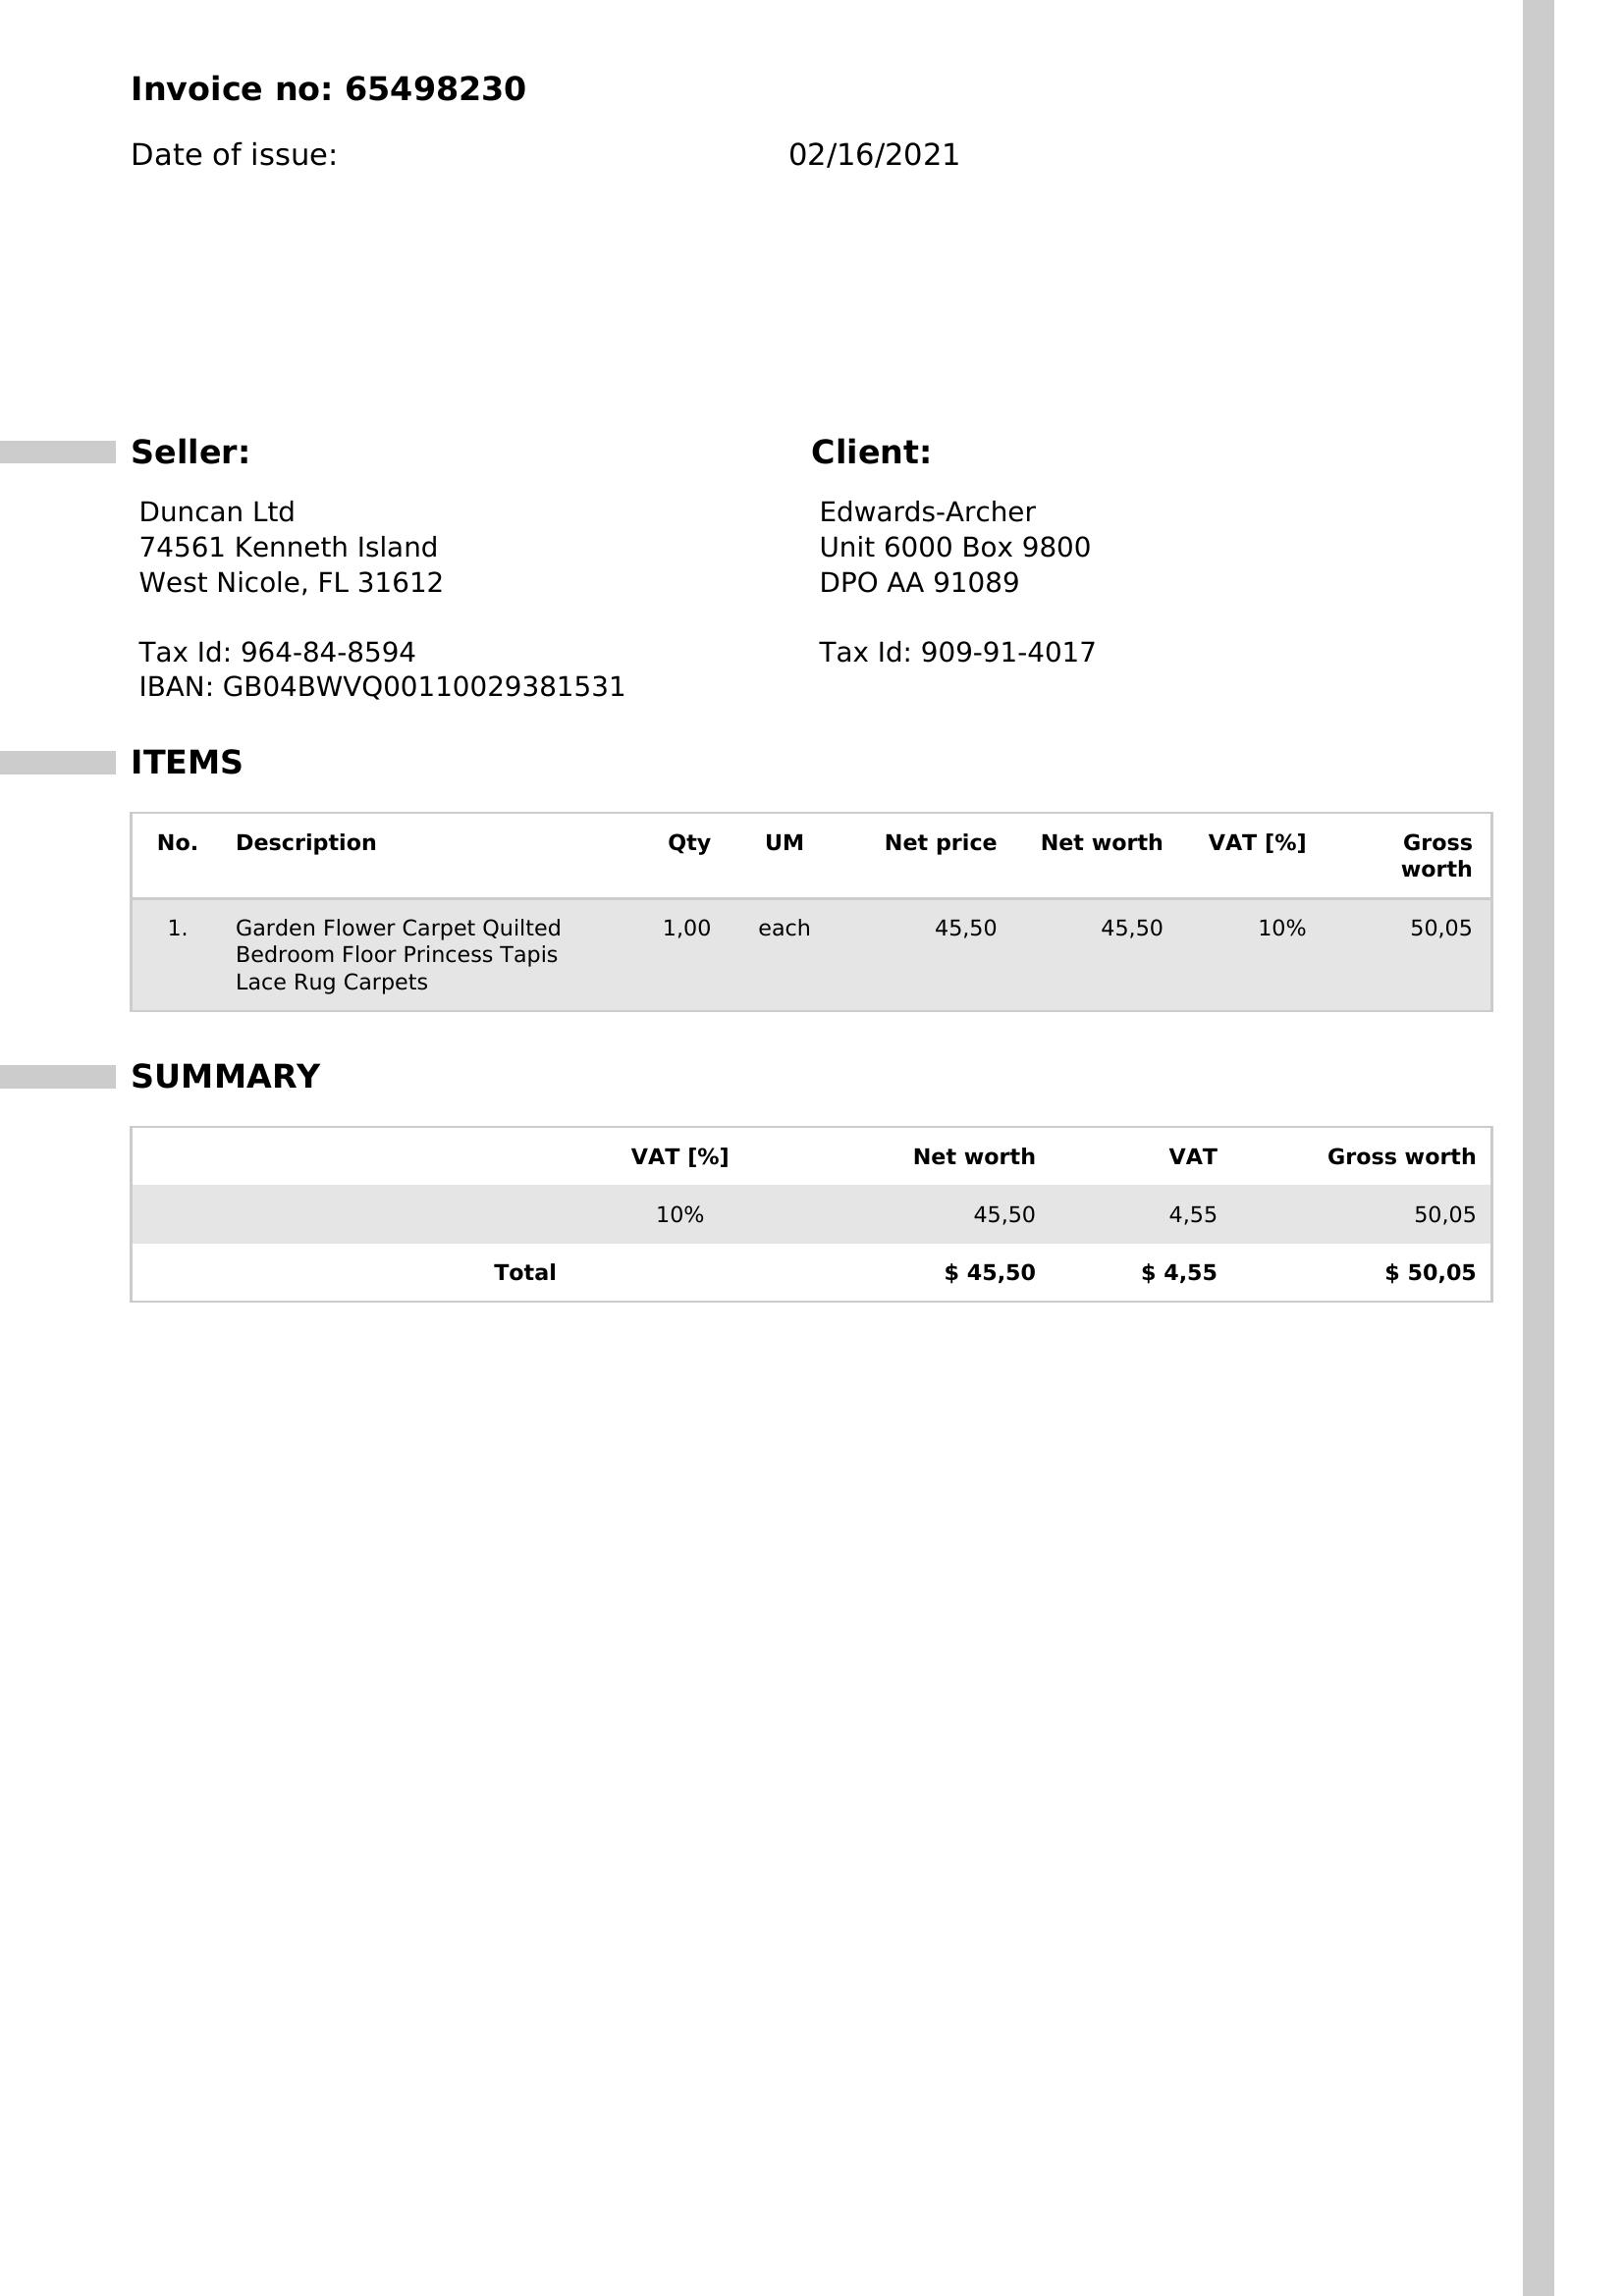

time: 160 ms (started: 2025-08-18 13:08:25 +00:00)


In [48]:
from transformers.image_utils import load_image
image1 = load_image("/kaggle/input/high-quality-invoice-images-for-ocr/batch_1/batch_1/batch1_1/batch1-0334.jpg")
image1

In [49]:
df[df['File Name']=='batch1-0387.jpg']['Json Data'].values[0]

'\n{\n  "invoice": {\n    "client_name": "Turner Ltd",\n    "client_address": "197 Donald Flat\\nBaileychester, MA 48782",\n    "seller_name": "Atkinson-Woods",\n    "seller_address": "730 Matthew Union\\nBlankenshipside, DE 36985",\n    "invoice_number": "11640046",\n    "invoice_date": "11/06/2014",\n    "due_date": ""\n  },\n  "items": [\n    {\n      "description": "Dell Desktop Computer Intel Core i5 Windows 10 pro 64 250gb 3.1ghz 4gb Ram",\n      "quantity": "1.00",\n      "total_price": "264.26"\n    },\n    {\n      "description": "Custom Gaming Desktop PC Computer - Core i5 4690, RX 470, 8GB RAM",\n      "quantity": "4.00",\n      "total_price": "1583.96"\n    },\n    {\n      "description": "Fast i7 RGB Gaming Desktop PC Computer VR-Ready WiFi AAA Fortnite GTAV PUBG IG3",\n      "quantity": "3.00",\n      "total_price": "2607.00"\n    },\n    {\n      "description": "custom gaming computer",\n      "quantity": "3.00",\n      "total_price": "1485.00"\n    },\n    {\n      "des

time: 2.86 ms (started: 2025-08-18 13:08:26 +00:00)


In [50]:
import json

# Safely extract fields from JSON
def extract_field(row, field):
    data = row['requested_data']
    if isinstance(data, str):
        data = json.loads(data)
    return data.get(field, None)

df_resp['invoice_number'] = df_resp.apply(lambda r: extract_field(r, 'invoice_number'), axis=1)
df_resp['invoice_date']   = df_resp.apply(lambda r: extract_field(r, 'invoice_date'), axis=1)
df_resp['client_name']    = df_resp.apply(lambda r: extract_field(r, 'client_name'), axis=1)
df_resp['seller_name']    = df_resp.apply(lambda r: extract_field(r, 'seller_name'), axis=1)
df_resp['total']          = df_resp.apply(lambda r: extract_field(r, 'total'), axis=1)


time: 27.7 ms (started: 2025-08-18 13:08:26 +00:00)


Duplicate

In [51]:
# Check for duplicates based on invoice_number + invoice_date
duplicates = df_resp[df_resp.duplicated(subset=["invoice_number", "invoice_date"], keep=False)]

print("\n=== Exact Duplicate Invoices ===")
if not duplicates.empty:
    print(duplicates[['file_name', 'invoice_number', 'invoice_date']])
else:
    print("No exact duplicates found.")

# Fuzzy duplicate check (catch typos in invoice_number)
from fuzzywuzzy import fuzz

suspect_dupes = []
for i, row1 in df_resp.iterrows():
    for j, row2 in df_resp.iterrows():
        if i < j:  # avoid self-comparison
            score = fuzz.ratio(str(row1['invoice_number']), str(row2['invoice_number']))
            if score > 90 and row1['invoice_date'] == row2['invoice_date']:
                suspect_dupes.append((row1['file_name'], row2['file_name'], score))

print("\n=== Suspected Fuzzy Duplicates ===")
if suspect_dupes:
    for dup in suspect_dupes:
        print(f"File1: {dup[0]} | File2: {dup[1]} | Similarity: {dup[2]}%")
else:
    print("No suspected fuzzy duplicates found.")



=== Exact Duplicate Invoices ===
No exact duplicates found.

=== Suspected Fuzzy Duplicates ===
No suspected fuzzy duplicates found.
time: 11.3 s (started: 2025-08-18 13:08:26 +00:00)


Fake

In [52]:
import json

# Helper function to safely extract a field from JSON
def extract_field(row, field):
    data = row['requested_data']
    if isinstance(data, str):
        try:
            data = json.loads(data)
        except:
            return None
    return data.get(field, None)

# Extract key fields
for field in ["invoice_number", "invoice_date", "client_name", "seller_name", "tax", "discount", "total"]:
    df_resp[field] = df_resp.apply(lambda r: extract_field(r, field), axis=1)


time: 37.2 ms (started: 2025-08-18 13:08:38 +00:00)


In [53]:
# Convert numeric fields to floats
for col in ["tax", "discount", "total"]:
    df_resp[col] = pd.to_numeric(df_resp[col], errors="coerce")  # invalid strings → NaN


time: 1.66 ms (started: 2025-08-18 13:08:38 +00:00)


In [54]:
# Example: check invoice number format
df_resp['invalid_invoice_number'] = df_resp['invoice_number'].apply(
    lambda x: not str(x).isdigit() or len(str(x)) < 4
)

# Cross-check against known vendors
valid_sellers = set(["Amazon", "Flipkart", "Reliance Retail"])
df_resp['unknown_seller'] = ~df_resp['seller_name'].isin(valid_sellers)

# Tax/total consistency
df_resp['inconsistent_amounts'] = (
    abs((df_resp['total'] - (df_resp['tax'] + df_resp['discount']))) > 1e-2
)

# Combine into a single fraud flag
df_resp['fraud_flag'] = (
    df_resp['invalid_invoice_number'] |
    df_resp['unknown_seller'] |
    df_resp['inconsistent_amounts']
)

# ---- PRINT RESULTS ----
print("\n=== Invalid Invoice Numbers ===")
print(df_resp[df_resp['invalid_invoice_number']][['file_name', 'invoice_number']])

print("\n=== Unknown Sellers ===")
print(df_resp[df_resp['unknown_seller']][['file_name', 'seller_name']])

print("\n=== Inconsistent Amounts ===")
print(df_resp[df_resp['inconsistent_amounts']][['file_name', 'invoice_number', 'tax', 'discount', 'total']])

print("\n=== Fraud-Flagged Invoices (Any Issue) ===")



=== Invalid Invoice Numbers ===
Empty DataFrame
Columns: [file_name, invoice_number]
Index: []

=== Unknown Sellers ===
           file_name                  seller_name
0    batch1-0208.jpg       Cox, Garcia and Briggs
1    batch1-0021.jpg  Bennett, Chavez and Vazquez
2    batch1-0074.jpg                 Peterson LLC
3    batch1-0085.jpg                    Myers Inc
4    batch1-0285.jpg                  Yang-Pierce
..               ...                          ...
494  batch1-0203.jpg             Herrera-Hamilton
495  batch1-0387.jpg               Atkinson-Woods
496  batch1-0262.jpg      Brown, Werner and Smith
497  batch1-0454.jpg      Knight, Howell and Pugh
498  batch1-0104.jpg                  Baker-Smith

[499 rows x 2 columns]

=== Inconsistent Amounts ===
Empty DataFrame
Columns: [file_name, invoice_number, tax, discount, total]
Index: []

=== Fraud-Flagged Invoices (Any Issue) ===
time: 13.7 ms (started: 2025-08-18 13:08:38 +00:00)


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Ghost Biller

In [55]:
# Detect Ghost Bills (missing or empty seller_name)
df_resp['ghost_bill'] = df_resp['seller_name'].isna() | (df_resp['seller_name'].astype(str).str.strip() == "")

print("\n=== Ghost Bills (No Seller Name) ===")
print(df_resp[df_resp['ghost_bill']][['file_name', 'invoice_number', 'invoice_date', 'total']])



=== Ghost Bills (No Seller Name) ===
Empty DataFrame
Columns: [file_name, invoice_number, invoice_date, total]
Index: []
time: 4.51 ms (started: 2025-08-18 13:08:38 +00:00)


In [56]:
# Combine into a single fraud flag
df_resp['fraud_flag'] = (
    df_resp['invalid_invoice_number'] |
    df_resp['unknown_seller'] |
    df_resp['inconsistent_amounts']
)

# ---- PRINT FRAUD-FLAGGED INVOICES ----
print("\n=== Fraud-Flagged Invoices (Any Issue) ===")
print(df_resp[df_resp['fraud_flag']][[
    'file_name', 
    'invoice_number', 
    'seller_name', 
    'total', 
    'invalid_invoice_number', 
    'unknown_seller', 
    'inconsistent_amounts'
]])



=== Fraud-Flagged Invoices (Any Issue) ===
           file_name invoice_number                  seller_name    total  \
0    batch1-0208.jpg       22883270       Cox, Garcia and Briggs  5493.34   
1    batch1-0021.jpg       96430839  Bennett, Chavez and Vazquez  4958.16   
2    batch1-0074.jpg       98852451                 Peterson LLC  4151.23   
3    batch1-0085.jpg       62256280                    Myers Inc      NaN   
4    batch1-0285.jpg       80871648                  Yang-Pierce   200.40   
..               ...            ...                          ...      ...   
494  batch1-0203.jpg       44649974             Herrera-Hamilton  3187.64   
495  batch1-0387.jpg       11640046               Atkinson-Woods  8487.82   
496  batch1-0262.jpg       92564069      Brown, Werner and Smith     2.18   
497  batch1-0454.jpg       73019594      Knight, Howell and Pugh   993.96   
498  batch1-0104.jpg       90188228                  Baker-Smith   353.66   

     invalid_invoice_number  un

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
